In [161]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv
/kaggle/input/aiffel-ds-3-house-prices/train.csv
/kaggle/input/aiffel-ds-3-house-prices/test.csv


# **- 저장 경로 -**

In [162]:
house_df_org = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/train.csv") 
house_df_test = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/test.csv")
submission = pd.read_csv("/kaggle/input/aiffel-ds-3-house-prices/sample_submission.csv")

# **- 데이터 이해 및 탐색 ('Features' 특성 확인) -**

In [163]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_df = house_df_org.copy()
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,135000
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,179000
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,176000


# **- 데이터 전처리 과정 (결측치 확인)-**

In [164]:
print('데이터 세트의 Shape:', house_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (1168, 81)

전체 feature 들의 type 
 object     43
int64      35
float64     3
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          1162
MiscFeature     1120
Alley           1098
Fence            941
MasVnrType       694
FireplaceQu      545
LotFrontage      218
GarageType        69
GarageYrBlt       69
GarageFinish      69
GarageQual        69
GarageCond        69
BsmtFinType2      24
BsmtExposure      24
BsmtFinType1      23
BsmtCond          23
BsmtQual          23
MasVnrArea         8
Electrical         1
dtype: int64


# **-데이터 이해 및 탐색 ('SalePrice' 별 'Count' 시각화)-**

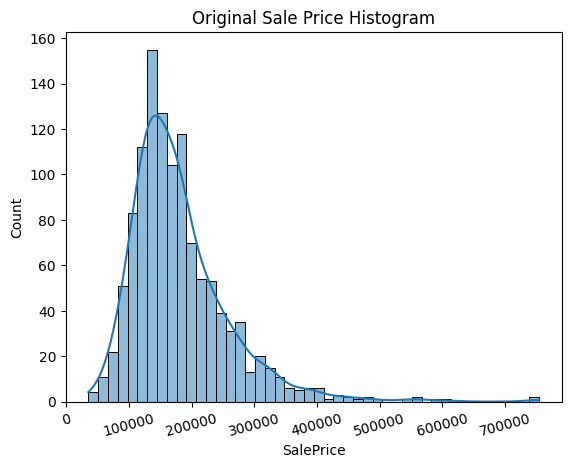

In [165]:
plt.title('Original Sale Price Histogram')
plt.xticks(rotation=15)
sns.histplot(house_df['SalePrice'], kde=True)
plt.show()

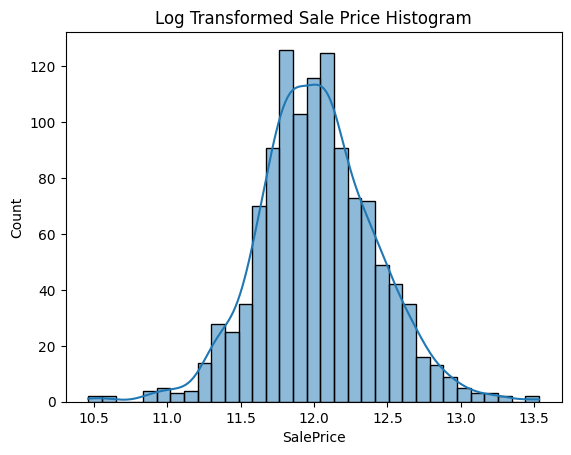

In [166]:
plt.title('Log Transformed Sale Price Histogram')
log_SalePrice = np.log1p(house_df['SalePrice'])
sns.histplot(log_SalePrice, kde=True)
plt.show()

In [167]:
original_SalePrice = house_df['SalePrice']
house_df['SalePrice'] = np.log1p(house_df['SalePrice'])

In [168]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,20,RL,NaN,7390,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2008,WD,Normal,11.813037
1,739,90,RL,60.0,10800,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,3,2009,WD,Alloca,12.095147
2,696,20,RL,54.0,13811,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,7,2006,WD,Normal,12.078245
3,239,20,RL,93.0,12030,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2007,New,Partial,12.669810
4,891,50,RL,60.0,8064,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,2000,7,2007,WD,Normal,11.719134


In [169]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


# **- 데이터 전처리 과정 (결측치 처리) -**

In [170]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 LotFrontage     float64
Alley            object
MasVnrType       object
MasVnrArea      float64
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


In [171]:
house_df['MasVnrArea'].fillna(house_df['MasVnrArea'].mean(),inplace=True)

In [172]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 LotFrontage     float64
Alley            object
MasVnrType       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
Electrical       object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


In [173]:
house_df['LotFrontage'].fillna(house_df['LotFrontage'].mean(),inplace=True)
house_df['GarageYrBlt'].fillna(house_df['GarageYrBlt'].mean(),inplace=True)

In [174]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 Alley           object
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
FireplaceQu     object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
PoolQC          object
Fence           object
MiscFeature     object
dtype: object


In [175]:
print('get_dummies() 수행 전 데이터 Shape:', house_df.shape)
house_df_ohe = pd.get_dummies(house_df)
print('get_dummies() 수행 후 데이터 Shape:', house_df_ohe.shape)

null_column_count = house_df_ohe.isnull().sum()[house_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (1168, 81)
get_dummies() 수행 후 데이터 Shape: (1168, 286)
## Null 피처의 Type :
 Series([], dtype: object)


In [176]:
def get_rmse(model):
    pred = model.predict(X_test)
    mse = mean_squared_error(y_test , pred)
    rmse = np.sqrt(mse)
    print('{0} 로그 변환된 RMSE: {1}'.format(model.__class__.__name__,np.round(rmse, 3)))
    return rmse

def get_rmses(models):
    rmses = [ ]
    for model in models:
        rmse = get_rmse(model)
        rmses.append(rmse)
    return rmses

#  **- 모델 선택 및 비교 -**
#  **'LinearRegression', 'Ridge', 'Lasso' 선택 및 비교**

In [177]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)


lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)

ridge_reg = Ridge()
ridge_reg.fit(X_train, y_train)

lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)

models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)

LinearRegression 로그 변환된 RMSE: 0.133
Ridge 로그 변환된 RMSE: 0.134
Lasso 로그 변환된 RMSE: 0.177


[0.1331910145834448, 0.13359823616381547, 0.17727257419179054]

In [178]:
def get_top_bottom_coef(model):
    
    coef = pd.Series(model.coef_, index=X_features.columns)
    
    
    coef_high = coef.sort_values(ascending=False).head(10)
    coef_low = coef.sort_values(ascending=False).tail(10)
    return coef_high, coef_low


# **- 데이터 전처리 과정 (회귀계수 시각화) -**

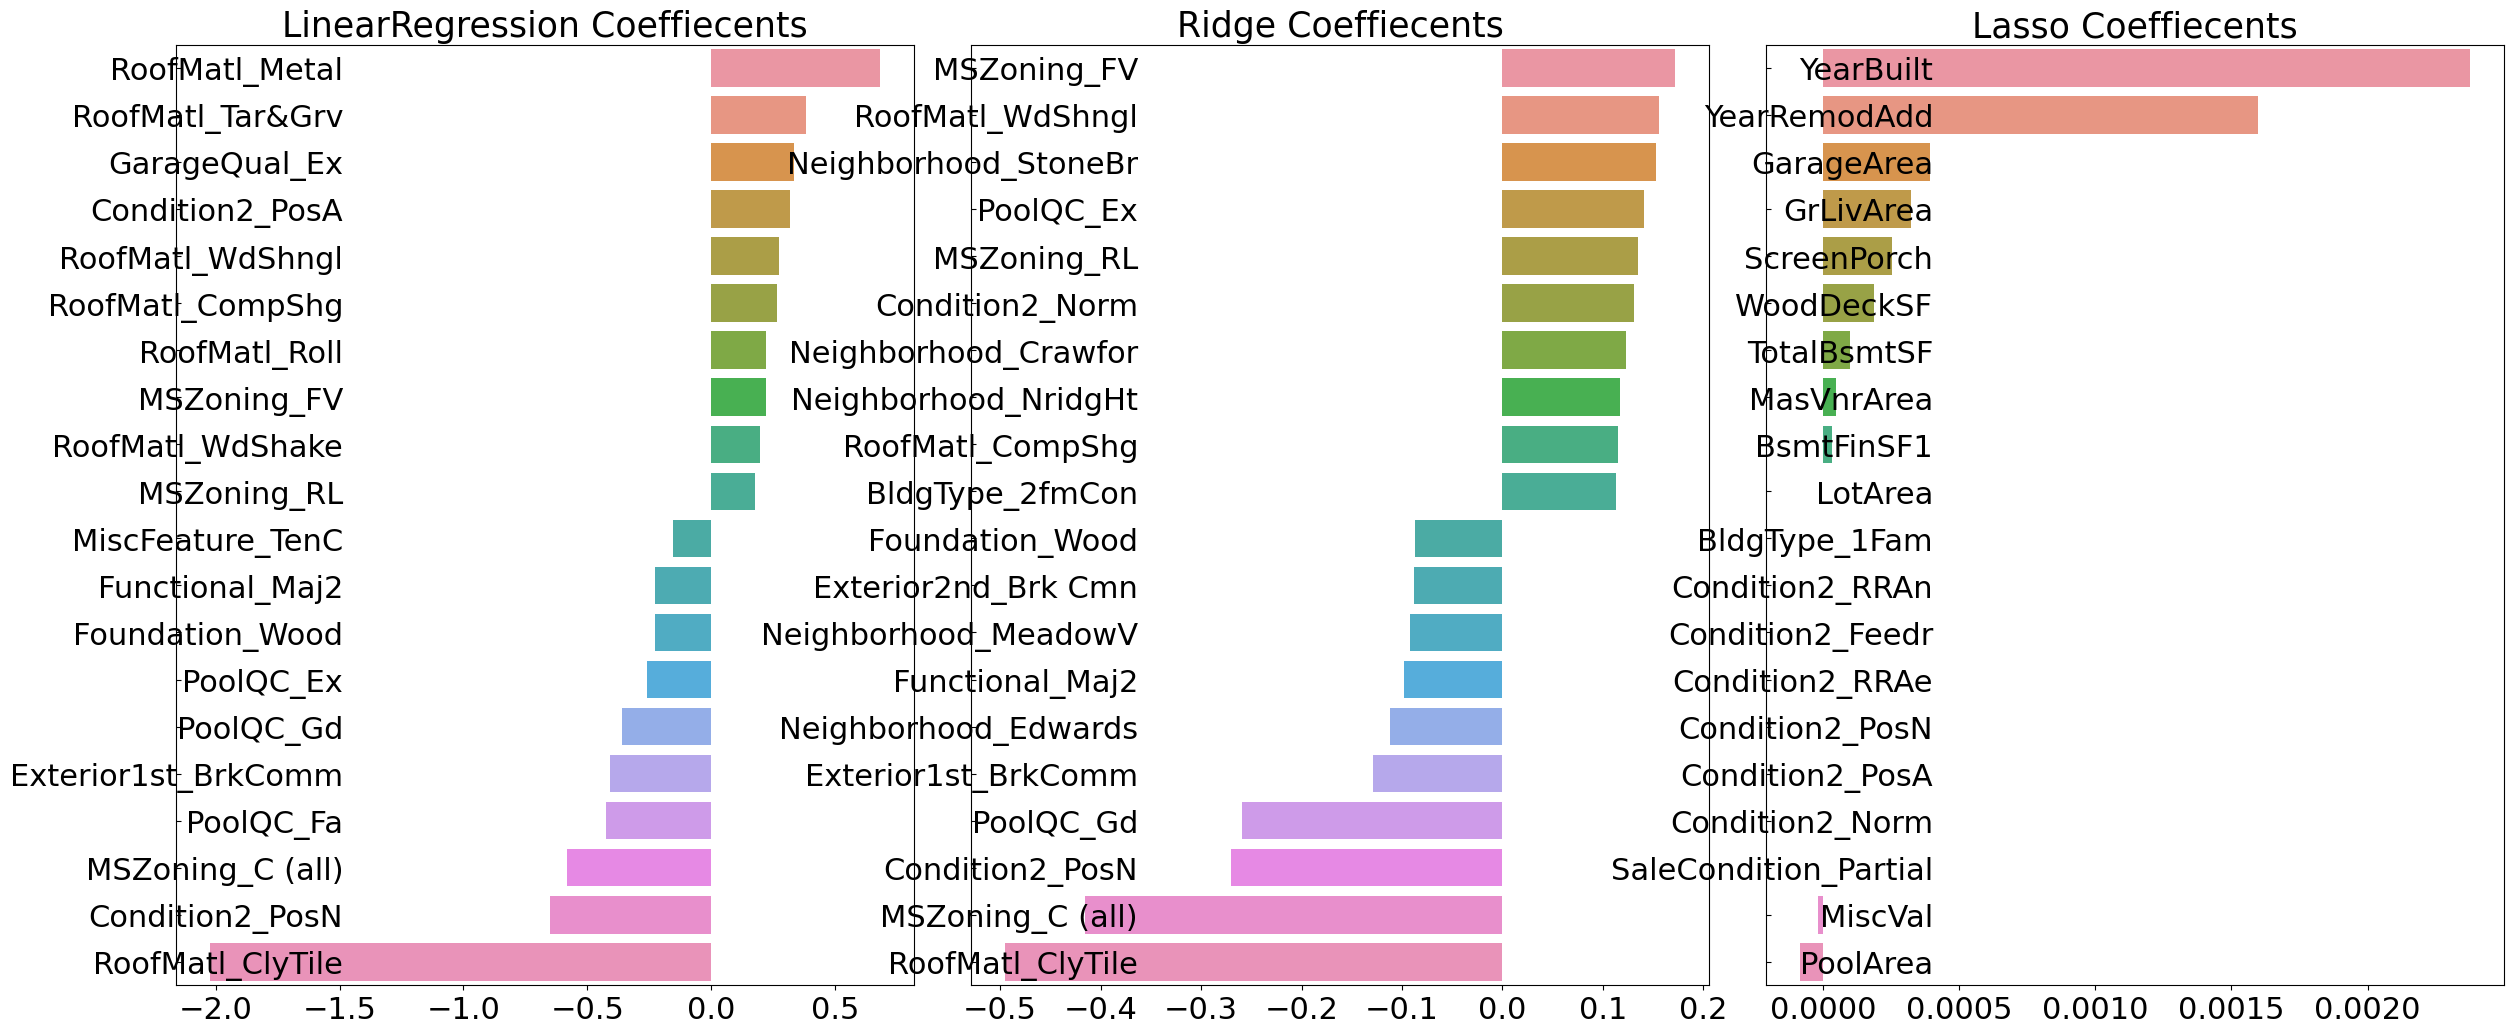

In [179]:
def visualize_coefficient(models):
  
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=3)
    fig.tight_layout() 
   
    for i_num, model in enumerate(models):
        
        coef_high, coef_low = get_top_bottom_coef(model)
        coef_concat = pd.concat( [coef_high , coef_low] )
        
        axs[i_num].set_title(model.__class__.__name__+' Coeffiecents', size=25)
        axs[i_num].tick_params(axis="y",direction="in", pad=-120)
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=coef_concat.values, y=coef_concat.index , ax=axs[i_num])

 
models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)


In [180]:
from sklearn.model_selection import cross_val_score

def get_avg_rmse_cv(models):
    for model in models:
        
        rmse_list = np.sqrt(-cross_val_score(model, X_features, y_target,
                                             scoring="neg_mean_squared_error", cv = 5))
        rmse_avg = np.mean(rmse_list)
        print('\n{0} CV RMSE 값 리스트: {1}'.format( model.__class__.__name__, np.round(rmse_list, 3)))
        print('{0} CV 평균 RMSE 값: {1}'.format( model.__class__.__name__, np.round(rmse_avg, 3)))

         
models = [lr_reg, ridge_reg, lasso_reg]
get_avg_rmse_cv(models)


LinearRegression CV RMSE 값 리스트: [0.25  0.197 0.132 0.129 0.117]
LinearRegression CV 평균 RMSE 값: 0.165

Ridge CV RMSE 값 리스트: [0.214 0.174 0.119 0.132 0.119]
Ridge CV 평균 RMSE 값: 0.152

Lasso CV RMSE 값 리스트: [0.287 0.212 0.173 0.185 0.17 ]
Lasso CV 평균 RMSE 값: 0.205


In [181]:
from sklearn.model_selection import GridSearchCV

def print_best_params(model, params):
    grid_model = GridSearchCV(model, param_grid=params, 
                              scoring='neg_mean_squared_error', cv=5)
    grid_model.fit(X_features, y_target)
    rmse = np.sqrt(-1* grid_model.best_score_)
    print('{0} 5 CV 시 최적 평균 RMSE 값: {1}, 최적 alpha:{2}'.format(model.__class__.__name__,
                                        np.round(rmse, 4), grid_model.best_params_))
    return grid_model.best_estimator_

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_rige = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1511, 최적 alpha:{'alpha': 12}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1524, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.133
Ridge 로그 변환된 RMSE: 0.129
Lasso 로그 변환된 RMSE: 0.123


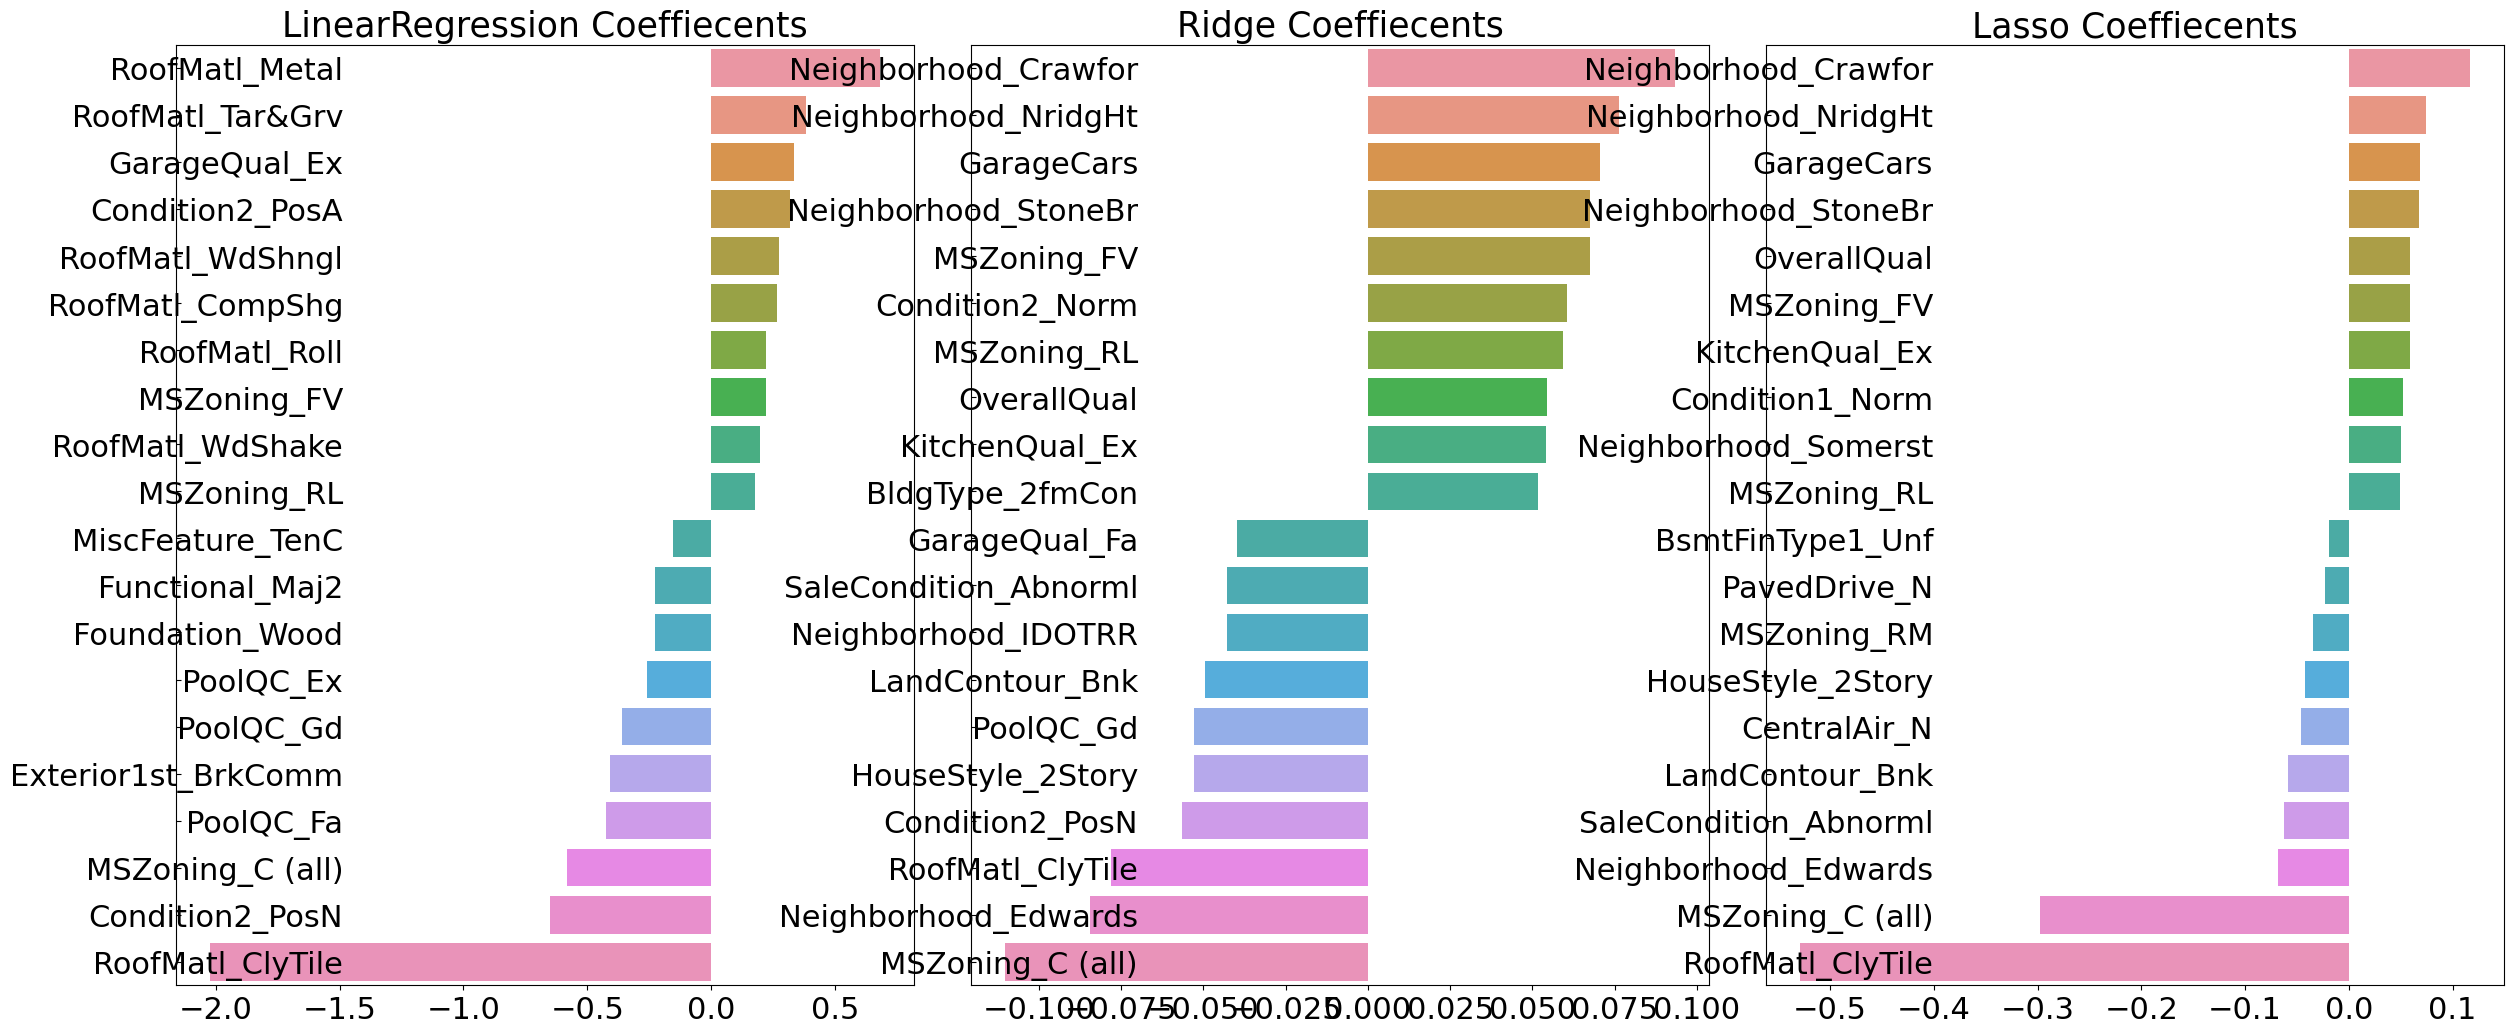

In [182]:

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=12)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)


models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

In [183]:
from scipy.stats import skew


features_index = house_df.dtypes[house_df.dtypes != 'object'].index

skew_features = house_df[features_index].apply(lambda x : skew(x))

skew_features_top = skew_features[skew_features > 1]
print(skew_features_top.sort_values(ascending=False))

MiscVal          22.099034
PoolArea         14.377604
LotArea          11.097791
3SsnPorch        11.040646
LowQualFinSF      9.608861
BsmtFinSF2        4.507199
KitchenAbvGr      4.488325
BsmtHalfBath      4.133732
ScreenPorch       3.976766
EnclosedPorch     3.093917
LotFrontage       2.760540
OpenPorchSF       2.454159
MasVnrArea        2.418589
BsmtFinSF1        1.881057
TotalBsmtSF       1.864686
WoodDeckSF        1.546567
1stFlrSF          1.488257
GrLivArea         1.474257
MSSubClass        1.391605
dtype: float64


In [184]:
house_df[skew_features_top.index] = np.log1p(house_df[skew_features_top.index])

# **- 데이터 전처리 과정 (One_Hot_Encoding) -**

In [185]:

house_df_ohe = pd.get_dummies(house_df)
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)


ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1336, 최적 alpha:{'alpha': 10}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1298, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.126
Ridge 로그 변환된 RMSE: 0.117
Lasso 로그 변환된 RMSE: 0.112


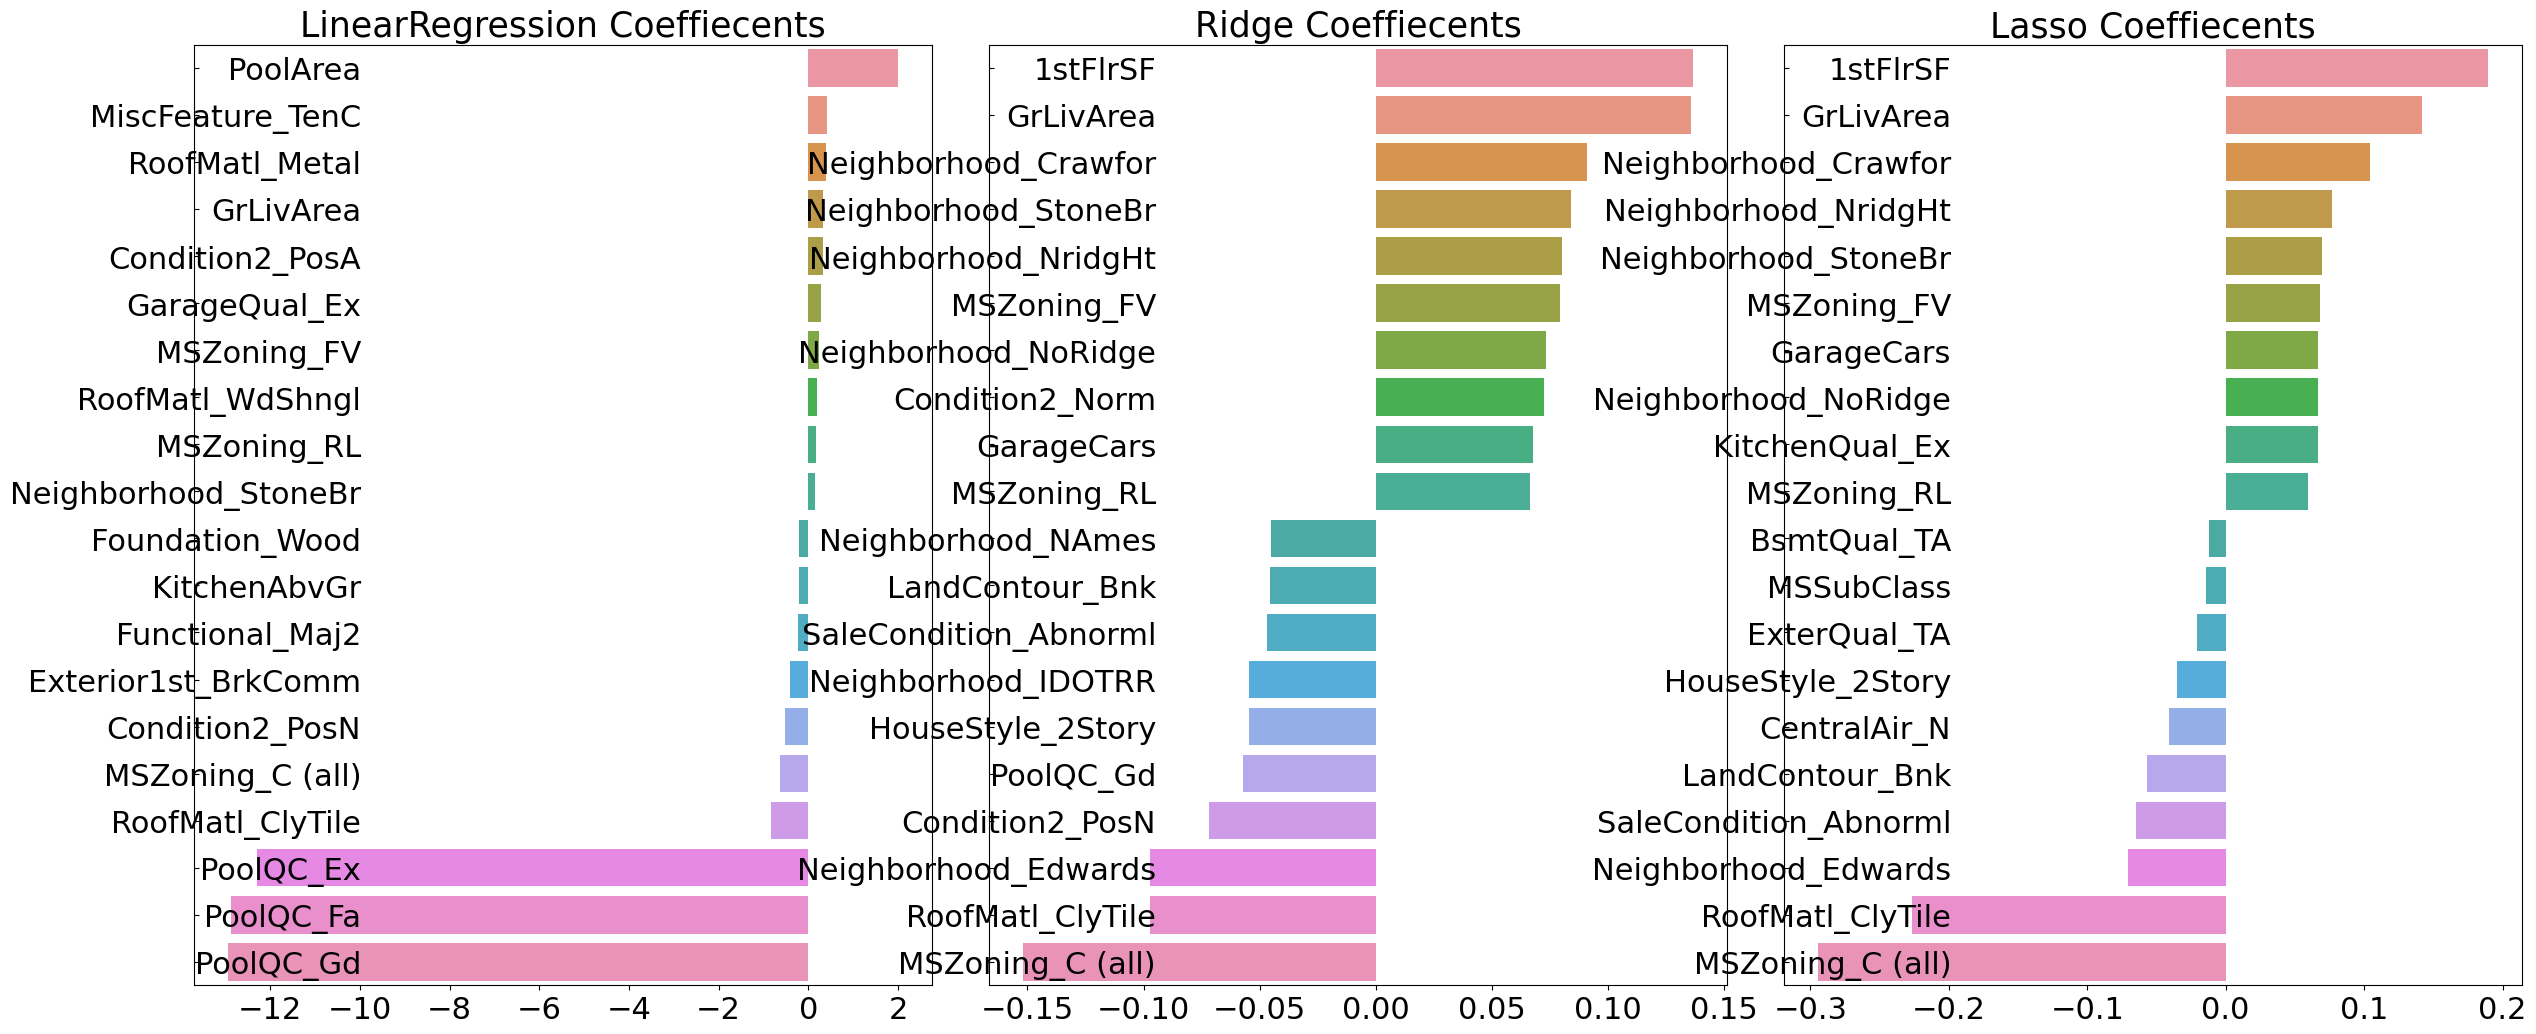

In [186]:

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=8)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)


models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

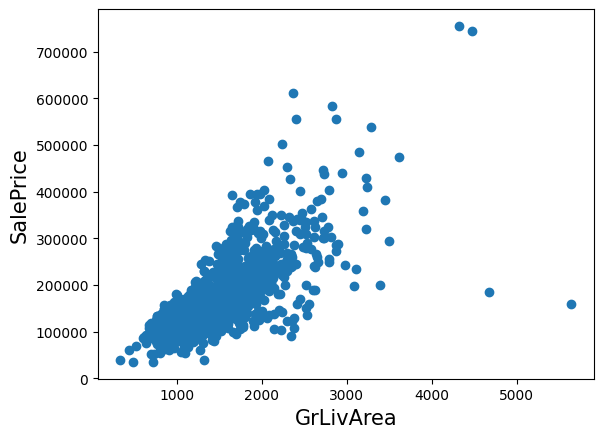

In [187]:
plt.scatter(x = house_df_org['GrLivArea'], y = house_df_org['SalePrice'])
plt.ylabel('SalePrice', fontsize=15)
plt.xlabel('GrLivArea', fontsize=15)
plt.show()

# **- 데이터 전처리 과정 (이상치 확인 및 처리) -**

In [188]:

cond1 = house_df_ohe['GrLivArea'] > np.log1p(4000)
cond2 = house_df_ohe['SalePrice'] < np.log1p(500000)
outlier_index = house_df_ohe[cond1 & cond2].index

print('아웃라이어 레코드 index :', outlier_index.values)
print('아웃라이어 삭제 전 house_df_ohe shape:', house_df_ohe.shape)

house_df_ohe.drop(outlier_index , axis=0, inplace=True)
print('아웃라이어 삭제 후 house_df_ohe shape:', house_df_ohe.shape)

아웃라이어 레코드 index : [ 64 373]
아웃라이어 삭제 전 house_df_ohe shape: (1168, 286)
아웃라이어 삭제 후 house_df_ohe shape: (1166, 286)


In [189]:
y_target = house_df_ohe['SalePrice']
X_features = house_df_ohe.drop('SalePrice',axis=1, inplace=False)
X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2, random_state=156)

ridge_params = { 'alpha':[0.05, 0.1, 1, 5, 8, 10, 12, 15, 20] }
lasso_params = { 'alpha':[0.001, 0.005, 0.008, 0.05, 0.03, 0.1, 0.5, 1,5, 10] }
best_ridge = print_best_params(ridge_reg, ridge_params)
best_lasso = print_best_params(lasso_reg, lasso_params)

Ridge 5 CV 시 최적 평균 RMSE 값: 0.1157, 최적 alpha:{'alpha': 5}
Lasso 5 CV 시 최적 평균 RMSE 값: 0.1134, 최적 alpha:{'alpha': 0.001}


LinearRegression 로그 변환된 RMSE: 0.128
Ridge 로그 변환된 RMSE: 0.117
Lasso 로그 변환된 RMSE: 0.112


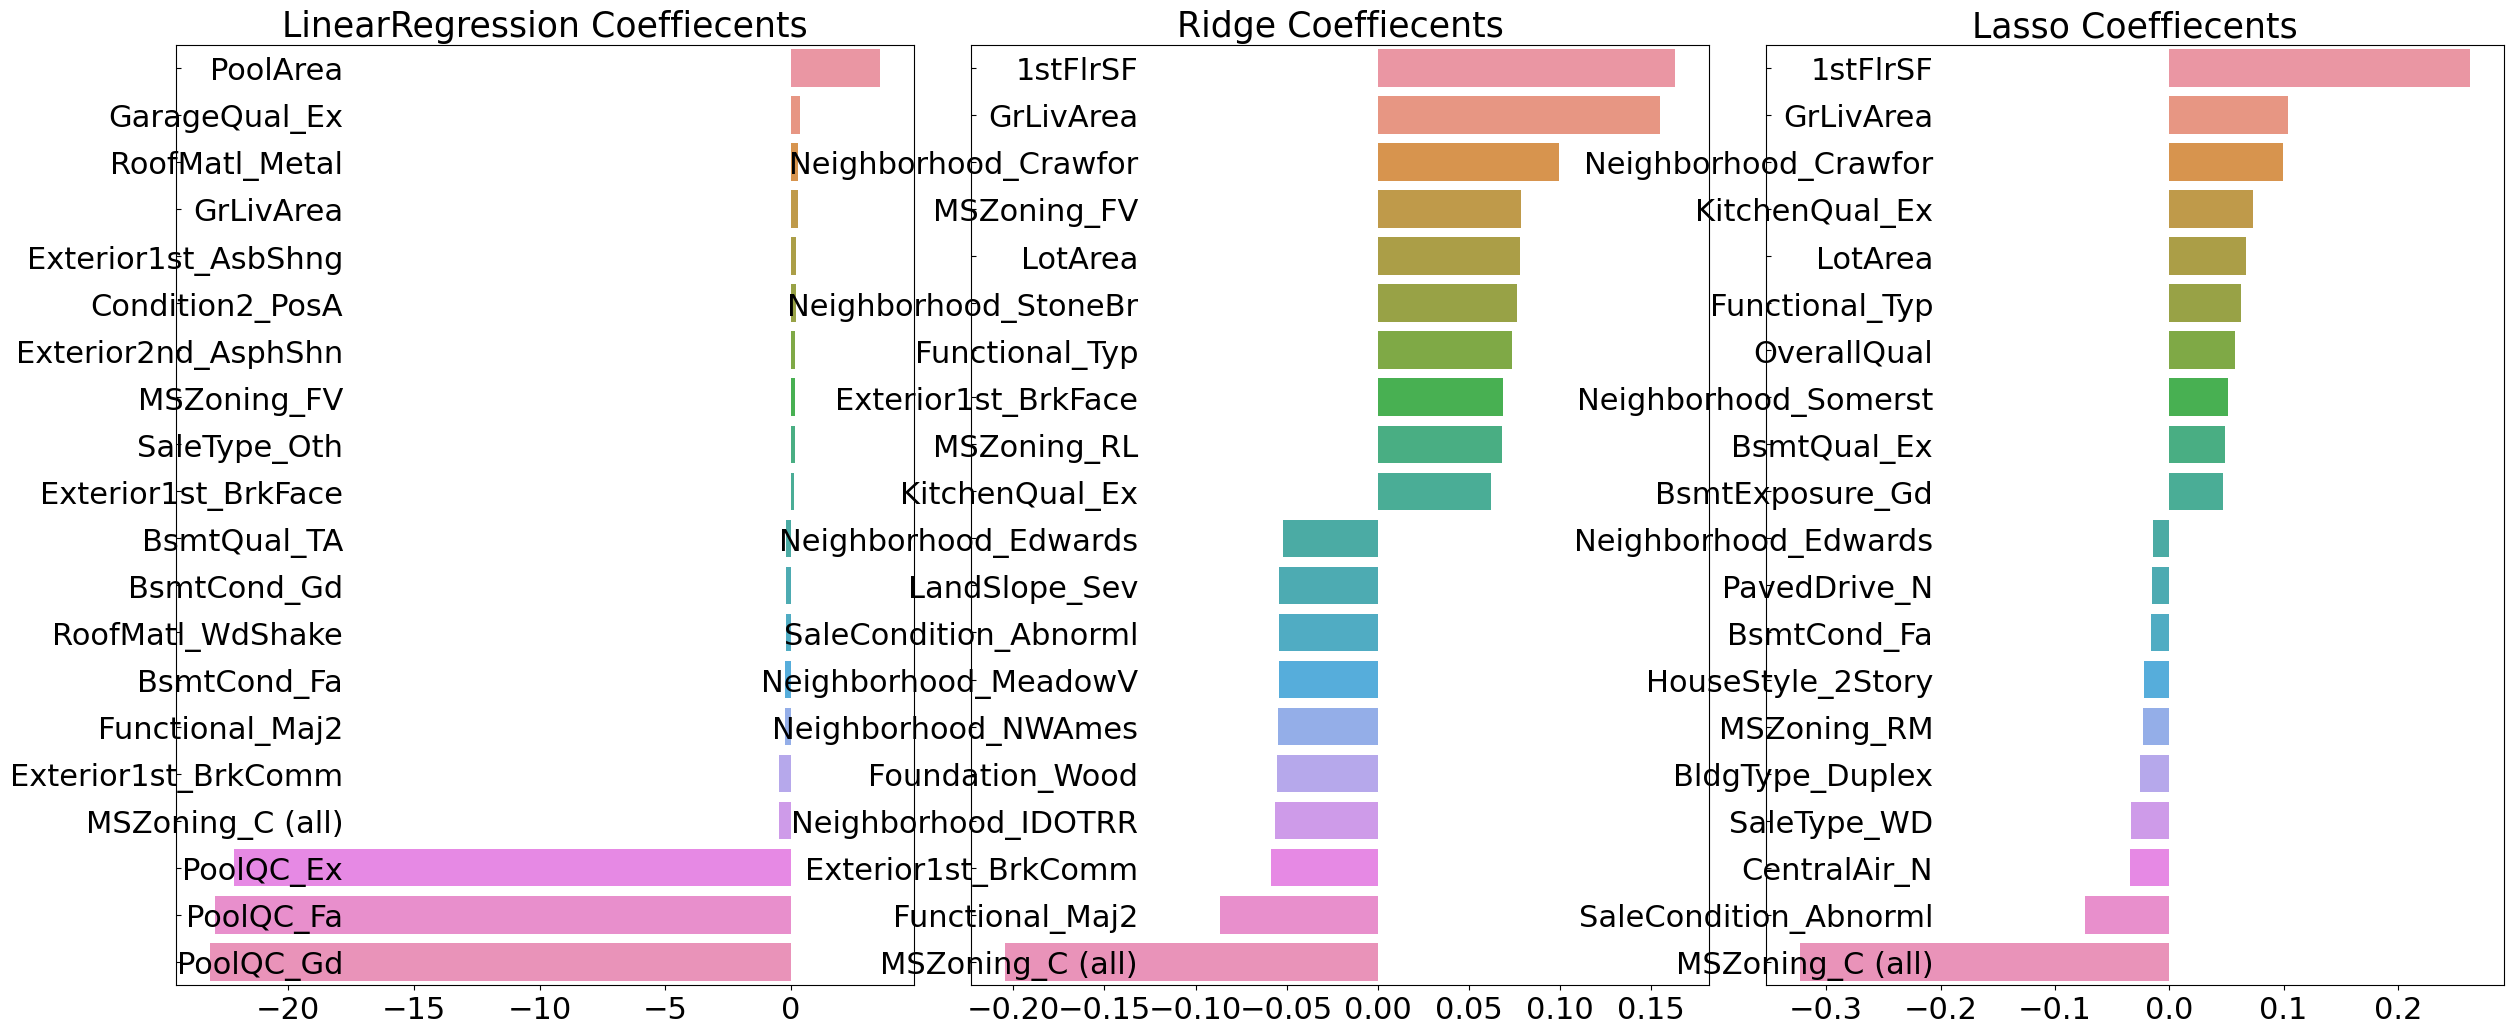

In [190]:

lr_reg = LinearRegression()
lr_reg.fit(X_train, y_train)
ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)


models = [lr_reg, ridge_reg, lasso_reg]
get_rmses(models)


models = [lr_reg, ridge_reg, lasso_reg]
visualize_coefficient(models)

# **- 모델 선택 및 비교 -**
# **Ensemble_Boosting: 'XGBoost' , 'LightGMB'**

In [191]:
from xgboost import XGBRegressor

xgb_params = {'n_estimators':[1000]}
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
best_xgb = print_best_params(xgb_reg, xgb_params)

XGBRegressor 5 CV 시 최적 평균 RMSE 값: 0.1268, 최적 alpha:{'n_estimators': 1000}


In [192]:
from lightgbm import LGBMRegressor

lgbm_params = {'n_estimators':[1000]}
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
best_lgbm = print_best_params(lgbm_reg, lgbm_params)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002001 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3212
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 174
[LightGBM] [Info] Start training from score 12.020420
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001142 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3197
[LightGBM] [Info] Number of data points in the train set: 933, number of used features: 166
[LightGBM] [Info] Start training from score 12.025656
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [

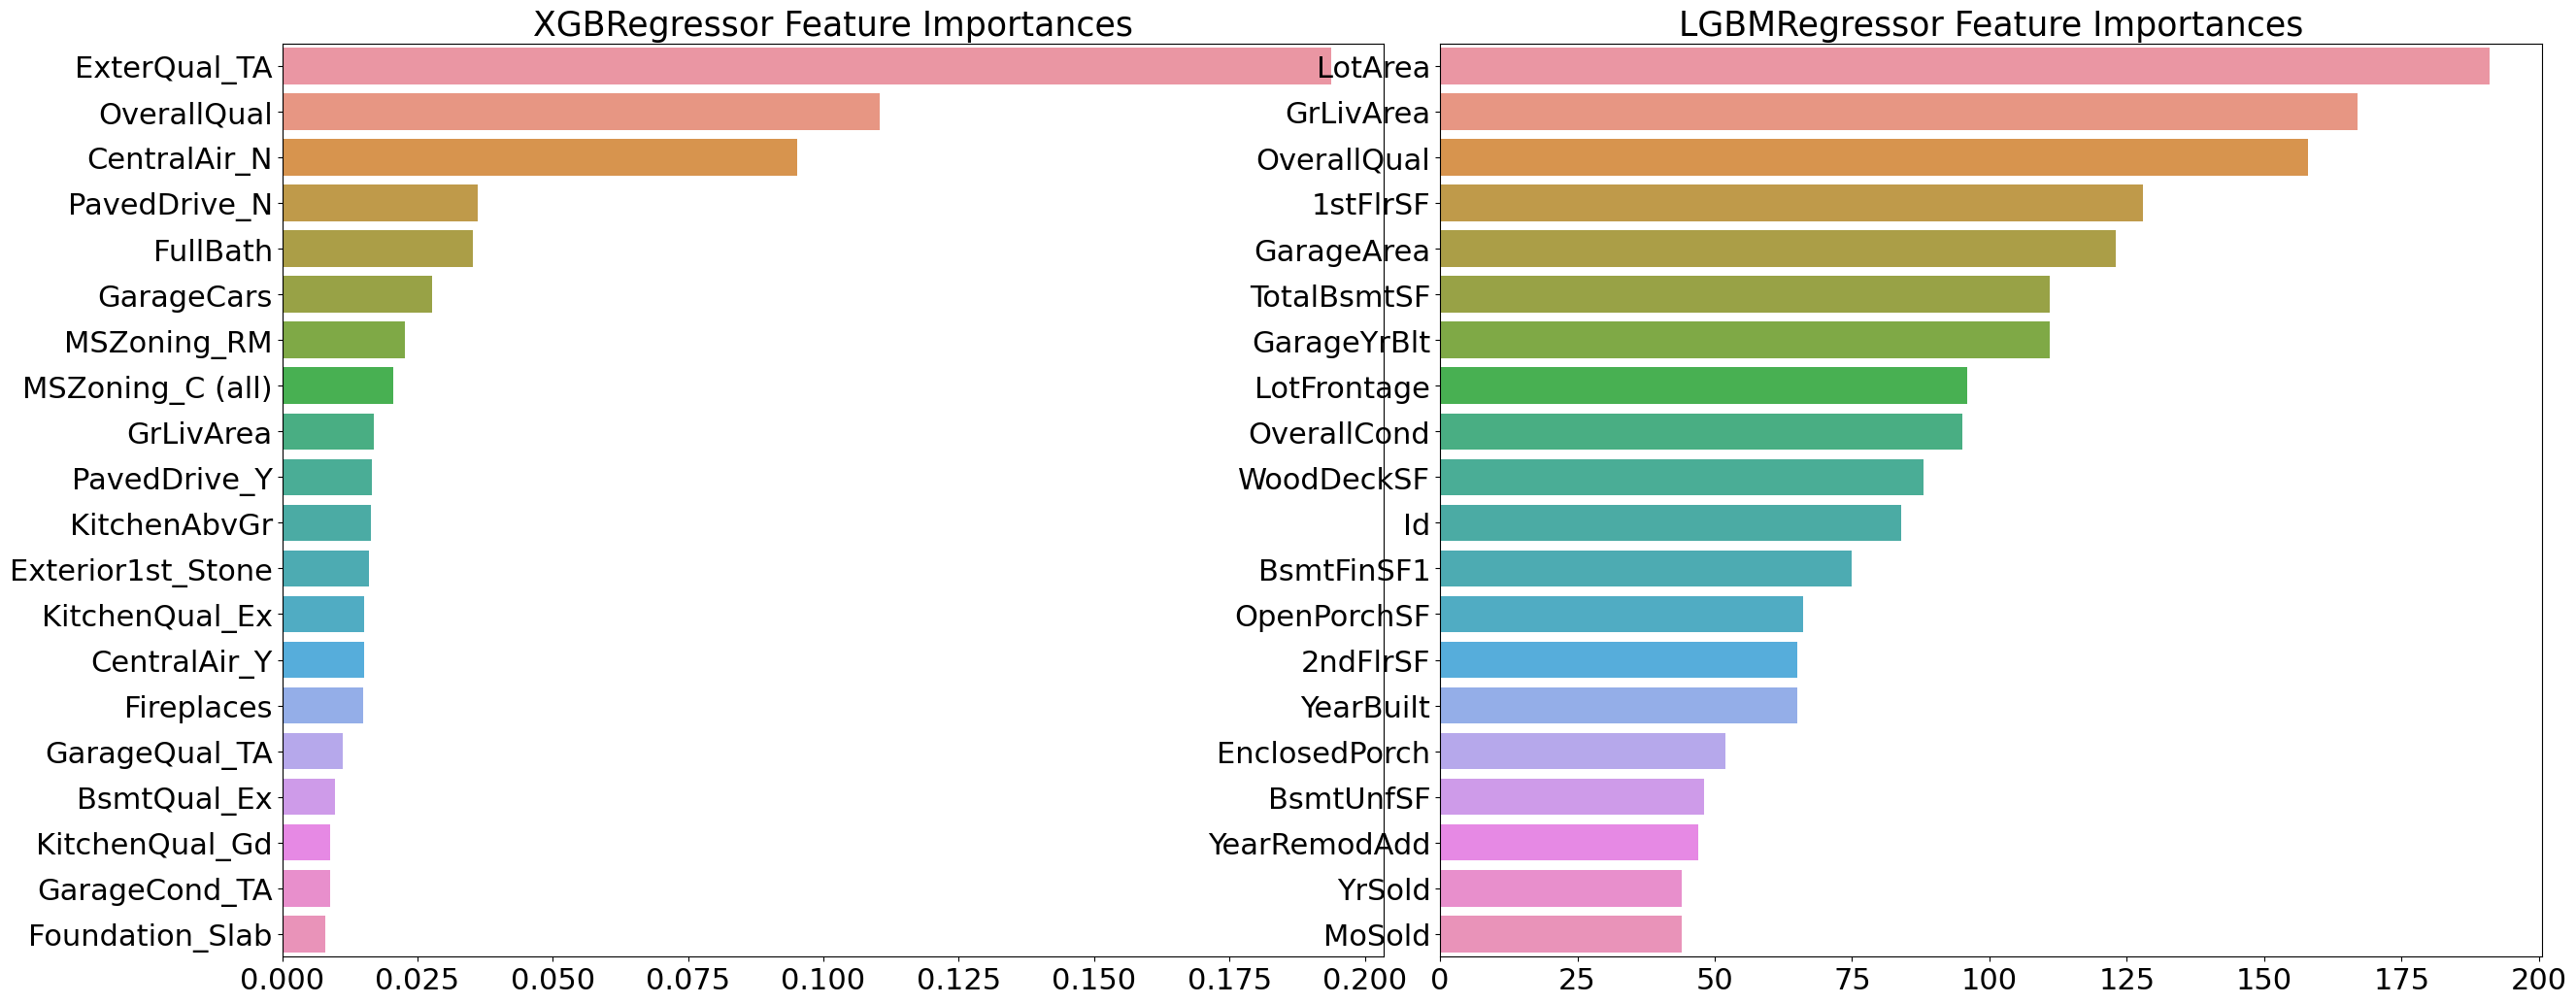

In [193]:

def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=X_features.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20

def visualize_ftr_importances(models):
   
    fig, axs = plt.subplots(figsize=(24,10),nrows=1, ncols=2)
    fig.tight_layout() 
     
    for i_num, model in enumerate(models):
      
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=25)
    
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(22)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])

   
models = [best_xgb, best_lgbm]
visualize_ftr_importances(models)


In [194]:
def get_rmse_pred(preds):
    for key in preds.keys():
        pred_value = preds[key]
        mse = mean_squared_error(y_test , pred_value)
        rmse = np.sqrt(mse)
        print('{0} 모델의 RMSE: {1}'.format(key, rmse))


ridge_reg = Ridge(alpha=5)
ridge_reg.fit(X_train, y_train)
lasso_reg = Lasso(alpha=0.001)
lasso_reg.fit(X_train, y_train)

ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)


pred = 0.4 * ridge_pred + 0.6 * lasso_pred
preds = {'최종 혼합': pred,
         'Ridge': ridge_pred,
         'Lasso': lasso_pred}

get_rmse_pred(preds)


최종 혼합 모델의 RMSE: 0.11271975195742272
Ridge 모델의 RMSE: 0.11689228334464634
Lasso 모델의 RMSE: 0.11225077637247761


# **- 성능 평가 (하이퍼파라미터 튜닝) -**

In [195]:
xgb_reg = XGBRegressor(n_estimators=1000, learning_rate=0.05, 
                       colsample_bytree=0.5, subsample=0.8)
lgbm_reg = LGBMRegressor(n_estimators=1000, learning_rate=0.05, num_leaves=4, 
                         subsample=0.6, colsample_bytree=0.4, reg_lambda=10, n_jobs=-1)
xgb_reg.fit(X_train, y_train)
lgbm_reg.fit(X_train, y_train)
xgb_pred = xgb_reg.predict(X_test)
lgbm_pred = lgbm_reg.predict(X_test)

pred = 0.5 * xgb_pred + 0.5 * lgbm_pred
preds = {'최종 혼합': pred,
         'XGBM': xgb_pred,
         'LGBM': lgbm_pred}
        
get_rmse_pred(preds)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001926 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3203
[LightGBM] [Info] Number of data points in the train set: 932, number of used features: 165
[LightGBM] [Info] Start training from score 12.029584
최종 혼합 모델의 RMSE: 0.1173934502989187
XGBM 모델의 RMSE: 0.12101418505459602
LGBM 모델의 RMSE: 0.12099196332814631


# **- 모델 선택 및 비교 -**
# **Ensemble_Stacking**

In [196]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error


def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds ):
  
    kf = KFold(n_splits=n_folds, shuffle=False)

    train_fold_pred = np.zeros((X_train_n.shape[0] ,1 ))
    test_pred = np.zeros((X_test_n.shape[0],n_folds))
    print(model.__class__.__name__ , ' model 시작 ')
    
    for folder_counter , (train_index, valid_index) in enumerate(kf.split(X_train_n)):
  
        print('\t 폴드 세트: ',folder_counter,' 시작 ')
        X_tr = X_train_n[train_index] 
        y_tr = y_train_n[train_index] 
        X_te = X_train_n[valid_index]  
        
     
        model.fit(X_tr , y_tr)       
     
        train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
      
        test_pred[:, folder_counter] = model.predict(X_test_n)
            
 
    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1,1)    
    
  
    return train_fold_pred , test_pred_mean

In [197]:
 
X_train_n = X_train.values
X_test_n = X_test.values
y_train_n = y_train.values


ridge_train, ridge_test = get_stacking_base_datasets(ridge_reg, X_train_n, y_train_n, X_test_n, 5)
lasso_train, lasso_test = get_stacking_base_datasets(lasso_reg, X_train_n, y_train_n, X_test_n, 5)
xgb_train, xgb_test = get_stacking_base_datasets(xgb_reg, X_train_n, y_train_n, X_test_n, 5)  
lgbm_train, lgbm_test = get_stacking_base_datasets(lgbm_reg, X_train_n, y_train_n, X_test_n, 5)

Ridge  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
Lasso  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
XGBRegressor  model 시작 
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
LGBMRegressor  model 시작 
	 폴드 세트:  0  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000773 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2941
[LightGBM] [Info] Number of data points in the train set: 745, number of used features: 155
[LightGBM] [Info] Start training from score 12.030249
	 폴드 세트:  1  시작 
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001265 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=tru

In [198]:

Stack_final_X_train = np.concatenate((ridge_train, lasso_train, 
                                      xgb_train, lgbm_train), axis=1)
Stack_final_X_test = np.concatenate((ridge_test, lasso_test, 
                                     xgb_test, lgbm_test), axis=1)


meta_model_lasso = Lasso(alpha=0.0005)


meta_model_lasso.fit(Stack_final_X_train, y_train)
final = meta_model_lasso.predict(Stack_final_X_test)
mse = mean_squared_error(y_test , final)
rmse = np.sqrt(mse)
print('스태킹 회귀 모델의 최종 RMSE 값은:', rmse)

스태킹 회귀 모델의 최종 RMSE 값은: 0.11083653459143854


In [199]:
np.expm1(house_df['SalePrice']) 

0       135000.0
1       179000.0
2       176000.0
3       318000.0
4       122900.0
          ...   
1163    200000.0
1164    190000.0
1165    272000.0
1166    274000.0
1167    359100.0
Name: SalePrice, Length: 1168, dtype: float64

In [200]:
house_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,3.044522,RL,4.263510,8.908018,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,7,2008,WD,Normal,11.813037
1,739,4.510860,RL,4.110874,9.287394,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,3,2009,WD,Alloca,12.095147
2,696,3.044522,RL,4.007333,9.533293,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.0,7,2006,WD,Normal,12.078245


In [201]:
print(submission.columns)

Index(['Id', 'SalePrice'], dtype='object')


# **- 이전까지의 과정을 house_df_test에도 적용 -**

In [202]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

house_test_df = house_df_test.copy()
house_test_df.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal


In [203]:
print('데이터 세트의 Shape:', house_test_df.shape)
print('\n전체 feature 들의 type \n',house_df.dtypes.value_counts())
isnull_series = house_test_df.isnull().sum()
print('\nNull 컬럼과 그 건수:\n ', isnull_series[isnull_series > 0].sort_values(ascending=False))

데이터 세트의 Shape: (292, 80)

전체 feature 들의 type 
 object     43
float64    21
int64      17
Name: count, dtype: int64

Null 컬럼과 그 건수:
  PoolQC          291
MiscFeature     286
Alley           271
Fence           238
MasVnrType      178
FireplaceQu     145
LotFrontage      41
BsmtFinType1     14
BsmtFinType2     14
BsmtExposure     14
BsmtCond         14
BsmtQual         14
GarageType       12
GarageYrBlt      12
GarageFinish     12
GarageQual       12
GarageCond       12
dtype: int64


In [204]:

house_test_df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
3,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
4,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml


In [205]:
# 이미 삭제 했는데 코드를 지워서 다시 작성 후 주석처리 함(컬럼 수를 보면 81개에서 75개로 6개가 사라진 것 확인)
# house_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

In [206]:
# Drop 하지 않는 숫자형 Null컬럼들은 평균값으로 대체하는데 int만 바뀌고 float인 
# 'MasVnrArea' , 'LotFrontage' , 'GarageYrBlt' 3개 컬럼은 fillna 적용이 안되서 직접 코딩 
# house_df.fillna(house_df.mean(),inplace=True)

In [207]:
null_column_count = house_test_df.isnull().sum()[house_test_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_test_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 LotFrontage     float64
Alley            object
MasVnrType       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinType2     object
FireplaceQu      object
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
PoolQC           object
Fence            object
MiscFeature      object
dtype: object


In [208]:
house_test_df['LotFrontage'].fillna(house_test_df['LotFrontage'].mean(),inplace=True)
house_test_df['GarageYrBlt'].fillna(house_test_df['GarageYrBlt'].mean(),inplace=True)

In [209]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 Alley           object
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
FireplaceQu     object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
PoolQC          object
Fence           object
MiscFeature     object
dtype: object


In [210]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,3.044522,RL,4.263510,8.908018,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,7,2008,WD,Normal,11.813037
1,739,4.510860,RL,4.110874,9.287394,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,3,2009,WD,Alloca,12.095147
2,696,3.044522,RL,4.007333,9.533293,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,7,2006,WD,Normal,12.078245
3,239,3.044522,RL,4.543295,9.395242,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,12,2007,New,Partial,12.669810
4,891,3.931826,RL,4.110874,8.995289,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,Shed,7.601402,7,2007,WD,Normal,11.719134


In [211]:
house_test_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,86,60,RL,121.0,16059,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal
1,227,60,RL,82.0,9950,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2007,WD,Abnorml
2,492,50,RL,79.0,9490,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,8,2006,WD,Normal
3,64,70,RM,50.0,10300,Pave,NaN,IR1,Bnk,AllPub,...,0,0,NaN,GdPrv,NaN,0,4,2010,WD,Normal
4,576,50,RL,80.0,8480,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,10,2008,COD,Abnorml


In [212]:
house_test_df.drop(['Id','PoolQC' , 'MiscFeature', 'Alley', 'Fence','FireplaceQu'], axis=1 , inplace=True)

In [213]:
house_test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,121.0,16059,Pave,Reg,Lvl,AllPub,Corner,Gtl,...,82,0,0,0,0,0,4,2006,WD,Normal
1,60,RL,82.0,9950,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,114,0,0,0,0,0,6,2007,WD,Abnorml
2,50,RL,79.0,9490,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,32,0,0,0,0,8,2006,WD,Normal
3,70,RM,50.0,10300,Pave,IR1,Bnk,AllPub,Inside,Gtl,...,11,64,0,0,0,0,4,2010,WD,Normal
4,50,RL,80.0,8480,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,102,0,0,0,0,10,2008,COD,Abnorml


In [214]:
house_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,968,3.044522,RL,4.263510,8.908018,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,7,2008,WD,Normal,11.813037
1,739,4.510860,RL,4.110874,9.287394,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,3,2009,WD,Alloca,12.095147
2,696,3.044522,RL,4.007333,9.533293,Pave,NaN,IR1,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,7,2006,WD,Normal,12.078245
3,239,3.044522,RL,4.543295,9.395242,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,NaN,NaN,0.000000,12,2007,New,Partial,12.669810
4,891,3.931826,RL,4.110874,8.995289,Pave,NaN,Reg,Lvl,AllPub,...,0.0,NaN,MnPrv,Shed,7.601402,7,2007,WD,Normal,11.719134


In [215]:
null_column_count = house_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 Alley           object
MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
FireplaceQu     object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
PoolQC          object
Fence           object
MiscFeature     object
dtype: object


In [216]:
null_column_count = house_test_df.isnull().sum()[house_df.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_test_df.dtypes[null_column_count.index])

## Null 피처의 Type :
 MasVnrType      object
BsmtQual        object
BsmtCond        object
BsmtExposure    object
BsmtFinType1    object
BsmtFinType2    object
Electrical      object
GarageType      object
GarageFinish    object
GarageQual      object
GarageCond      object
dtype: object


In [217]:
print('get_dummies() 수행 전 데이터 Shape:', house_test_df.shape)
house_test_df_ohe = pd.get_dummies(house_test_df)
print('get_dummies() 수행 후 데이터 Shape:', house_test_df_ohe.shape)

null_column_count = house_test_df_ohe.isnull().sum()[house_test_df_ohe.isnull().sum() > 0]
print('## Null 피처의 Type :\n', house_test_df_ohe.dtypes[null_column_count.index])

get_dummies() 수행 전 데이터 Shape: (292, 74)
get_dummies() 수행 후 데이터 Shape: (292, 233)
## Null 피처의 Type :
 Series([], dtype: object)


In [218]:
for i in house_df_ohe.columns:
    if i not in house_test_df_ohe.columns:
        house_test_df_ohe[i] = 0 

In [219]:
house_test_df_ohe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleCondition_AdjLand
0,60,121.0,16059,8,5,1991,1992,284.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,82.0,9950,7,5,1995,1995,290.0,565,0,...,0,0,0,0,0,0,0,0,0,0
2,50,79.0,9490,6,7,1941,1950,0.0,403,165,...,0,0,0,0,0,0,0,0,0,0
3,70,50.0,10300,7,6,1921,1950,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,80.0,8480,5,5,1947,1950,0.0,442,0,...,0,0,0,0,0,0,0,0,0,0


In [220]:
house_df_ohe.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,968,3.044522,4.263510,8.908018,5,7,1955,1955,5.023881,6.805723,...,False,False,False,True,False,False,False,False,True,False
1,739,4.510860,4.110874,9.287394,5,5,1987,1988,0.000000,7.090910,...,False,False,False,True,False,False,True,False,False,False
2,696,3.044522,4.007333,9.533293,6,6,1987,1987,4.290459,6.888572,...,False,False,False,True,False,False,False,False,True,False
3,239,3.044522,4.543295,9.395242,8,5,2007,2007,5.541264,0.000000,...,False,True,False,False,False,False,False,False,False,True
4,891,3.931826,4.110874,8.995289,5,7,1949,2006,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [221]:
for i in house_test_df_ohe.columns:
    if i not in house_df_ohe.columns:
        house_test_df_ohe.drop(i, axis=1, inplace=True)

In [222]:
house_test_df_ohe.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_MnWw,MiscFeature_Gar2,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,SaleType_CWD,SaleCondition_AdjLand
0,60,121.0,16059,8,5,1991,1992,284.0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,60,82.0,9950,7,5,1995,1995,290.0,565,0,...,0,0,0,0,0,0,0,0,0,0
2,50,79.0,9490,6,7,1941,1950,0.0,403,165,...,0,0,0,0,0,0,0,0,0,0
3,70,50.0,10300,7,6,1921,1950,0.0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,50,80.0,8480,5,5,1947,1950,0.0,442,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
house_df_ohe.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,968,3.044522,4.263510,8.908018,5,7,1955,1955,5.023881,6.805723,...,False,False,False,True,False,False,False,False,True,False
1,739,4.510860,4.110874,9.287394,5,5,1987,1988,0.000000,7.090910,...,False,False,False,True,False,False,True,False,False,False
2,696,3.044522,4.007333,9.533293,6,6,1987,1987,4.290459,6.888572,...,False,False,False,True,False,False,False,False,True,False
3,239,3.044522,4.543295,9.395242,8,5,2007,2007,5.541264,0.000000,...,False,True,False,False,False,False,False,False,False,True
4,891,3.931826,4.110874,8.995289,5,7,1949,2006,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False


In [224]:
X_train

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
167,546,3.931826,4.263510,9.535174,7,5,1988,1988,5.187386,6.910751,...,False,False,False,True,False,False,False,False,True,False
1089,600,5.081404,3.218876,7.576097,6,6,1980,1980,0.000000,4.406719,...,False,False,False,False,False,False,False,False,True,False
527,1375,4.110874,4.454347,9.271059,7,5,2005,2005,0.000000,0.000000,...,False,False,False,True,False,False,False,False,True,False
459,1137,3.931826,4.394449,9.169623,6,5,1950,1950,0.000000,5.638355,...,False,False,False,True,True,False,False,False,False,False
1065,1269,3.931826,4.263510,9.554001,8,9,1935,1997,6.450470,5.262690,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,14,3.044522,4.521789,9.273597,7,5,2006,2007,5.726848,0.000000,...,False,True,False,False,False,False,False,False,False,True
851,901,3.044522,4.263510,8.901230,4,6,1971,1971,0.000000,5.777652,...,False,False,False,True,False,False,False,False,True,False
1036,1215,4.454347,4.248495,9.230731,5,5,1962,1962,0.000000,6.665684,...,False,False,False,True,False,False,False,False,True,False
813,672,4.262680,4.007333,8.799360,6,6,1925,1950,0.000000,6.313548,...,False,False,False,True,False,False,False,False,True,False


In [225]:
house_test_df_ohe.drop('SalePrice' ,axis=1, inplace=True)

In [226]:
xgb_pred = xgb_reg.predict(house_test_df_ohe)

In [228]:
xgb_pred

array([11.761273 , 11.790878 , 12.045087 , 11.942492 , 11.815348 ,
       11.784933 , 11.717058 , 11.679074 , 11.685123 , 11.97584  ,
       11.685102 , 11.679062 , 11.554113 , 11.723964 , 11.856208 ,
       11.868542 , 12.004722 , 11.817179 , 11.761637 , 11.942511 ,
       11.978364 , 11.714524 , 11.888132 , 11.853233 , 11.776567 ,
       11.761127 , 11.725514 , 11.962139 , 11.826936 , 11.684069 ,
       11.734274 , 11.926611 , 11.769594 , 11.657609 , 11.692073 ,
       11.660326 , 11.715192 , 11.709683 , 11.720803 , 11.722593 ,
       11.78973  , 11.85966  , 11.860968 , 11.757384 , 11.6679125,
       11.858355 , 11.934751 , 11.732693 , 11.729169 , 11.686774 ,
       11.775587 , 11.998813 , 11.82095  , 11.662282 , 11.646259 ,
       11.809251 , 11.795559 , 11.860031 , 11.789635 , 11.687997 ,
       11.61677  , 11.631923 , 11.792669 , 11.681937 , 11.808338 ,
       11.729067 , 11.795472 , 11.712415 , 11.968188 , 11.956852 ,
       11.8106365, 11.96247  , 11.712084 , 11.669707 , 11.7182

In [229]:
house_test_df_ohe = house_test_df_ohe.apply(pd.to_numeric, errors='coerce')

In [230]:
house_test_df_ohe.fillna(0, inplace=True)

In [231]:
house_test_df_ohe_log = np.log1p(house_test_df_ohe)

In [232]:
xgb_pred = xgb_reg.predict(house_test_df_ohe_log)

In [234]:
np.expm1(xgb_pred)

array([111464.72 , 112184.03 , 108127.016, 107970.18 , 105504.75 ,
       110494.914, 106795.16 , 106557.6  ,  98507.22 , 106556.79 ,
       102943.91 , 103119.01 , 102111.13 , 107487.92 , 113494.96 ,
        97513.44 , 103604.78 , 111939.625, 109128.266,  92281.21 ,
       100761.37 , 107285.45 , 102797.93 , 102889.63 , 105393.625,
       106571.625, 103197.61 , 107190.85 , 112198.586, 102902.98 ,
       104629.59 , 106357.9  , 103537.516,  93389.58 , 103756.95 ,
       103467.44 , 101896.83 , 103867.94 , 102663.51 , 102756.27 ,
       110342.33 , 101860.484, 101767.375, 103380.54 , 109534.49 ,
       106701.49 , 103369.3  , 103257.47 , 103816.74 ,  94161.195,
       102920.74 , 103097.375, 106132.45 , 102256.53 , 102855.39 ,
       107209.05 , 112690.695, 108684.26 , 106280.23 , 104309.88 ,
       104303.914, 102486.35 , 104571.04 , 102501.305, 105953.34 ,
       107627.016, 111588.09 , 104277.66 ,  92758.21 , 109867.81 ,
       110810.125, 103893.7  , 103013.25 , 104829.25 , 102925.

In [235]:
submission = pd.DataFrame({'id': submission['Id'], 'SalePrice': np.expm1(xgb_pred)})
submission.to_csv('submission.csv', index=False)

In [236]:
submission

,id,SalePrice
0,86,111464.718750
1,227,112184.031250
2,492,108127.015625
3,64,107970.179688
4,576,105504.750000
...,...,...
287,1271,100585.187500
288,903,103508.593750
289,1019,102886.890625
290,312,102099.062500
